The Challenge is to classify news items into 1 of 46 categories.

In [1]:
#pip install contractions

In [2]:
#Importing required libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import contractions

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline

import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
#Read the dataset
data = pd.read_excel('train.xlsx')
#View the top rows
data.head()

,text,class
0,? ? ? said as a result of its december acquisi...,3
1,? generale de banque sa lt ? br and lt heller ...,4
2,? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlr...,3
3,? the farmers home administration the u s agri...,4
4,? seton co said its board has received a propo...,4


In [4]:
#Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8982 non-null   object
 1   class   8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [5]:
#Return a Series containing counts of unique values
data['class'].value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
36      49
12      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
29      19
37      19
38      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
Name: class, dtype: int64

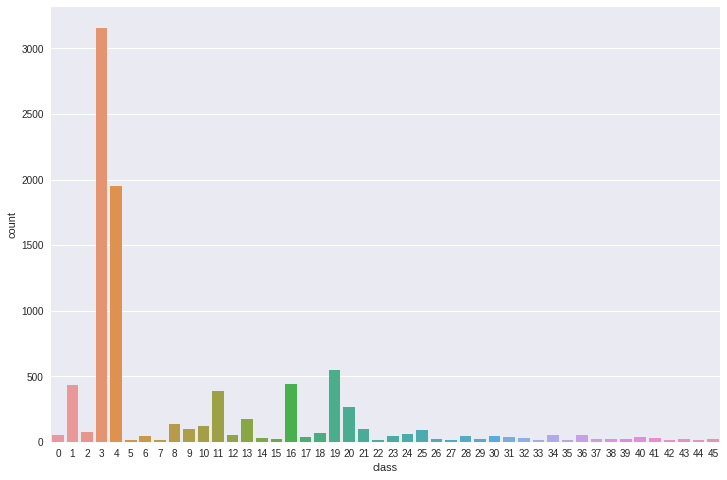

In [6]:
#Show the counts of observations using bars
plt.figure(figsize=(12,8))
sns.countplot('class',data=data);

Text Normalization: When we normalize text, we attempt to reduce its randomness. This helps us to reduce the amount of different information that the computer has to deal with, and therefore improves efficiency. \
Operations: Text cleaning, Tokenization, Expand Contractions, Case Conversions, Remove Stopwords, Lemmatization and Stemming

In [7]:
#Expand Contractions
data.text = data.text.apply(lambda item: ' '.join([contractions.fix(word) for word in item.split()]) )
data.head()

,text,class
0,? ? ? said as a result of its december acquisi...,3
1,? generale de banque sa lt ? br and lt heller ...,4
2,? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlr...,3
3,? the farmers home administration the you s ag...,4
4,? seton co said its board has received a propo...,4


In [8]:
#Remove Punctuations and Numbers
data.text = data.text.apply(lambda item: re.sub('[^a-zA-Z]',' ',str(item)))
data.head()

,text,class
0,said as a result of its december acquisi...,3
1,generale de banque sa lt br and lt heller ...,4
2,shr dlrs vs cts shr diluted dlr...,3
3,the farmers home administration the you s ag...,4
4,seton co said its board has received a propo...,4


In [9]:
#Remove Whitespace
data.text = data.text.apply(lambda item: re.sub(r"\s+", " ", item, flags=re.UNICODE))
data.head()

,text,class
0,said as a result of its december acquisition ...,3
1,generale de banque sa lt br and lt heller ove...,4
2,shr dlrs vs cts shr diluted dlrs vs cts net m...,3
3,the farmers home administration the you s agr...,4
4,seton co said its board has received a propos...,4


In [10]:
data.text = data.text.apply(lambda item: ' '.join([word for word in item.split() if not len(word)<3]) )
data.head()

,text,class
0,said result its december acquisition space exp...,3
1,generale banque and heller overseas corp chica...,4
2,shr dlrs cts shr diluted dlrs cts net mln avg ...,3
3,the farmers home administration the you agricu...,4
4,seton said its board has received proposal fro...,4


In [11]:
stopwords = nlp.Defaults.stop_words
stopwords.remove('not')

data.text = data.text.apply(lambda item: nlp(str(item)))
data.text = data.text.apply(lambda item: [words.lemma_ for words in item if not words in stopwords])
data.text = data.text.apply(lambda item: ' '.join([words for words in item]))
data.head()

,text,class
0,say result -PRON- december acquisition space e...,3
1,generale banque and heller overseas corp chica...,4
2,shr dlrs cts shr diluted dlrs ct net mln avg s...,3
3,the farmers home administration the you agricu...,4
4,seton say -PRON- board have receive proposal f...,4


In [12]:
x = data['text']
y = data['class']

In [13]:
#The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents
vector = TfidfVectorizer()
vx = vector.fit_transform(x)

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(vx,y,test_size=0.3,random_state=101)

In [15]:
accuracy = []
f1 = []

The word ‘Forest’ in the term suggests that it will contain a lot of trees. The algorithm contains a bundle of decision trees to make a classification. It works great when it comes to taking decisions on data by creating branches from a root, which are essentially the conditions present in the data, and providing an output known as a leaf. \
Pros:
1. It reduces overfitting in decision trees and helps to improve the accuracy
2. It is flexible to both classification and regression problems
3. It works well with both categorical and continuous values

Cons:
1. It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
2. It also requires much time for training as it combines a lot of decision trees to determine the class.

In [16]:
random_forest = RandomForestClassifier(n_estimators=150)
random_forest.fit(xtrain,ytrain)
predictions = random_forest.predict(xtest)

accuracy.append(accuracy_score(ytest,predictions))
f1.append(f1_score(ytest,predictions,average='micro'))

print('Accuracy Score: ', accuracy_score(ytest,predictions))
print('F1 Score: ', f1_score(ytest,predictions,average='micro'))
print(classification_report(ytest,predictions))

Accuracy Score:  0.7532467532467533
F1 Score:  0.7532467532467532
              precision    recall  f1-score   support

           0       0.88      0.32      0.47        22
           1       0.65      0.83      0.73       130
           2       0.81      0.52      0.63        25
           3       0.89      0.90      0.90       936
           4       0.67      0.91      0.77       582
           5       0.00      0.00      0.00         7
           6       1.00      0.32      0.48        19
           7       1.00      0.50      0.67         6
           8       0.79      0.58      0.67        45
           9       0.87      0.76      0.81        34
          10       0.91      0.69      0.78        29
          11       0.67      0.80      0.73       122
          12       0.67      0.50      0.57        12
          13       0.75      0.39      0.51        54
          14       0.00      0.00      0.00        11
          15       1.00      0.17      0.29         6
          16   

In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. \
Pros:
1. It works really well with a clear margin of separation
2. It is effective in high dimensional spaces.

Cons:
1. It doesn’t perform well when we have large data set because the required training time is higher
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping

In [17]:
svm = SVC(kernel='linear')
svm.fit(xtrain,ytrain)
predictions = svm.predict(xtest)

accuracy.append(accuracy_score(ytest,predictions))
f1.append(f1_score(ytest,predictions,average='micro'))

print('Accuracy Score: ', accuracy_score(ytest,predictions))
print('F1 Score: ', f1_score(ytest,predictions,average='micro'))
print(classification_report(ytest,predictions))

Accuracy Score:  0.8174397031539888
F1 Score:  0.8174397031539888
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.73      0.82      0.77       130
           2       0.74      0.68      0.71        25
           3       0.91      0.92      0.92       936
           4       0.78      0.92      0.85       582
           5       0.00      0.00      0.00         7
           6       1.00      0.89      0.94        19
           7       1.00      0.50      0.67         6
           8       0.90      0.62      0.74        45
           9       0.89      0.91      0.90        34
          10       0.93      0.93      0.93        29
          11       0.76      0.81      0.78       122
          12       0.70      0.58      0.64        12
          13       0.74      0.63      0.68        54
          14       0.73      0.73      0.73        11
          15       1.00      0.17      0.29         6
          16   

In [18]:
naive = MultinomialNB(alpha=0)
naive.fit(xtrain,ytrain)
predictions = naive.predict(xtest)

accuracy.append(accuracy_score(ytest,predictions))
f1.append(f1_score(ytest,predictions,average='micro'))

print('Accuracy Score: ', accuracy_score(ytest,predictions))
print('F1 Score: ', f1_score(ytest,predictions,average='micro'))
print(classification_report(ytest,predictions))

Accuracy Score:  0.7020408163265306
F1 Score:  0.7020408163265306
              precision    recall  f1-score   support

           0       0.92      0.50      0.65        22
           1       0.61      0.69      0.65       130
           2       0.64      0.28      0.39        25
           3       0.90      0.83      0.86       936
           4       0.64      0.88      0.74       582
           5       0.50      0.14      0.22         7
           6       1.00      0.58      0.73        19
           7       1.00      0.33      0.50         6
           8       0.79      0.42      0.55        45
           9       0.92      0.68      0.78        34
          10       0.91      0.72      0.81        29
          11       0.48      0.71      0.58       122
          12       0.40      0.17      0.24        12
          13       0.68      0.56      0.61        54
          14       0.25      0.09      0.13        11
          15       1.00      0.17      0.29         6
          16   

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(200,200),activation='relu')
mlp.fit(xtrain,ytrain)
predictions = mlp.predict(xtest)

accuracy.append(accuracy_score(ytest,predictions))
f1.append(f1_score(ytest,predictions,average='micro'))

print('Accuracy Score: ', accuracy_score(ytest,predictions))
print('F1 Score: ', f1_score(ytest,predictions,average='micro'))
print(classification_report(ytest,predictions))

Accuracy Score:  0.7959183673469388
F1 Score:  0.7959183673469388
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.77      0.79      0.78       130
           2       0.80      0.80      0.80        25
           3       0.90      0.90      0.90       936
           4       0.78      0.88      0.83       582
           5       0.00      0.00      0.00         7
           6       1.00      0.84      0.91        19
           7       1.00      0.50      0.67         6
           8       0.80      0.73      0.77        45
           9       0.85      0.85      0.85        34
          10       0.96      0.83      0.89        29
          11       0.74      0.75      0.75       122
          12       0.73      0.67      0.70        12
          13       0.73      0.74      0.73        54
          14       0.71      0.45      0.56        11
          15       1.00      0.33      0.50         6
          16   

Text(0, 0.5, 'Algorithm')

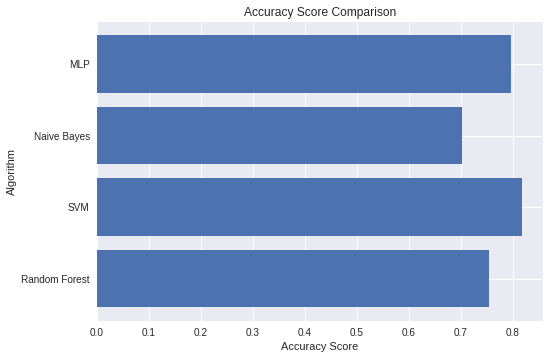

In [20]:
fig, ax = plt.subplots()
ax.barh(('Random Forest','SVM','Naive Bayes','MLP'),accuracy);
plt.title('Accuracy Score Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithm')

Text(0, 0.5, 'Algorithm')

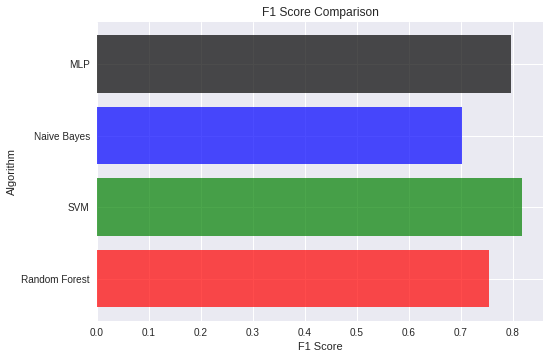

In [21]:
fig, ax = plt.subplots()
ax.barh(('Random Forest','SVM','Naive Bayes','MLP'),f1,color=['r','g','b','black'],alpha=0.7)
plt.title('F1 Score Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Algorithm')